In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**TABLE OF CONTENTS**


1.   DATA PREPARATION (PRE-MODELING)
2.   DATASET EXPLORATION
     * BASIC EXPLORATION OF DATA
     * CATEGORICAL/CONTINUOUS FEATURE IDENTIFICATION
     * TARGET VARIABLE EXPLORATION
     *  SUMMARY
3.   DATASET PRE-PROCESSING  
     * MISSING VALUES EXPLORATION
     * OUTLIERS EXPLORATION
     *  SUMMARY

4.  EXPLORATORY DATA ANALYSIS
    * HIGH LIFETIME USER CHURNING OUT
    * TRENDS IN USER/CALLS/SMS/GPRS/DATA
    * CONTINUOUS VS CONTINUOUS HEATMAP
    * CONTINUOUS vs TARGET PLOTS
    * CATEGORICAL vs TARGET PLOTS

5.  DATA PREPARATION (FOR MODELING)
    * TRAIN-TEST SPLIT
    * NORMALIZATION/TRANSFORMATION
    * BALANCING DATA
    * PCA  PERSPECTIVE

6.  MODELING
    * CROSS VALIDATION FOR ALL THE MODELS TO SELECT BEST MODEL
    * HYPER PARAMETER TUNING
7.  EVALUATION
    * PLOT ROC/PR CURVE
    * PR/ROC CURVE AT 5 CROSSFOLDS
    * OPTIMAL THRESHOLD IDENTIFICATION
    * MODEL EVALUATION ON TEST SET
    * CONFUSION MATRIX
    * FEATURE IMPORTANCE BASED ON GINI IMPURUTY AND PERMUTATION FEATURE METHOD



## **BEST MODEL SUMMARY**

* ***Chosen Gradient Boosting Classifier as best model.***
   
   GradientBoostingClassifier(random_state=1) accuracy: 0.7288101106160518
* **Hyper-parameter tuning**
   
  Following are best set of parameters.
  *	learning_rate =0.01
  *	n_estimators=400
  *	max_depth=7
  *	subsample=0.6
  *	min_samples_split=6
* **With Tuning we improved F1 score from 0.67 to 0.726 which is 8.3% improvement**
* **Metrics:** 
 *	Average Precision 0.72
 *	Average Recall 0.76
 *	Average Max F1 Score 0.74
 *	Average_optimal threshold: 0.36
  * Area under PR Curve is 0.80
  * One plotting ROC, we got AUC of 0.93

* Based on **permutation feature importance technique and GINI Impurity**, we found following features are contributing the most.

  * 8TH MONTH
  
  call_outgoing_duration_max
  user_no_ourgoing_activity_in_days
  reloads_count
  reloads_inactive_days
  sms_outgoing_spendings

  * 7TH MONTH
  
  user_has_outgoing_calls
  sms_incoming_count

  * 6TH MONTH
  
  user_has_outgoing_calls
  calls_outgoing_duration_max
  sms_incoming_count




In [ ]:
# import modules we need for EDA and wrangling
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
# import other functions we'll need for classification modeling
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # logistic
from sklearn.preprocessing import PowerTransformer
# classification error metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
# import other functions we'll need for classification modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.inspection import permutation_importance

# import functions for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# classification error metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.svm import SVC

## 1. **DATA PREPARATION (PRE-MODELING)**

In [ ]:
pip install pyxlsb;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/DS_python_materials/assignments/CD.xlsb",engine='pyxlsb')
df_target = pd.read_excel("/content/drive/MyDrive/DS_python_materials/assignments/CD.xlsb",engine = 'pyxlsb',sheet_name="Customer churners")

In [ ]:
# This dataframe is used for EDA.
EDA_df = pd.merge(df,df_target,how='left',on='user_account_id')
EDA_df.shape

(182343, 68)

In [ ]:
# Separating columns based on month.
cols = df.columns

DataFrame_Month_6 = df[df['month']==6]
cols6 = ["6_"+s for s in cols ]
cols6[2] = 'user_account_id'
DataFrame_Month_6.set_axis(cols6, axis=1,inplace=True)


DataFrame_Month_7 = df[df['month']==7]
cols7 = ["7_"+s for s in cols ]
cols7[2] = 'user_account_id'
DataFrame_Month_7.set_axis(cols7, axis=1,inplace=True)


DataFrame_Month_8 = df[df['month']==8]
cols8 = ["8_"+s for s in cols ]
cols8[2] = 'user_account_id'
DataFrame_Month_8.set_axis(cols8, axis=1,inplace=True)

In [ ]:
# Merging different "month" dataframes using join on Primary Key "User_account_id"

df_combined = pd.merge(pd.merge(pd.merge(DataFrame_Month_6,DataFrame_Month_7,how='outer',on='user_account_id'),DataFrame_Month_8,how='outer',on='user_account_id'),df_target,how='outer',on='user_account_id')

# Following are columns that are not needed as entire column captures same information
Cols_tobe_Removed = ['6_year','7_year','8_year','user_account_id','6_month','7_month','8_month','year','month']

df_combined.drop(Cols_tobe_Removed,axis=1,inplace=True)

## **2.   DATASET EXPLORATION**

### **BASIC EXPLORATION OF DATA**

In [ ]:
# Check for shape
df_combined.shape

(66469, 187)

In [ ]:
df_combined.describe()

,6_user_lifetime,6_user_intake,6_user_no_outgoing_activity_in_days,6_user_account_balance_last,6_user_spendings,6_user_has_outgoing_calls,6_user_has_outgoing_sms,6_user_use_gprs,6_user_does_reload,6_reloads_inactive_days,...,8_last_100_calls_outgoing_duration,8_last_100_calls_outgoing_to_onnet_duration,8_last_100_calls_outgoing_to_offnet_duration,8_last_100_calls_outgoing_to_abroad_duration,8_last_100_sms_outgoing_count,8_last_100_sms_outgoing_to_onnet_count,8_last_100_sms_outgoing_to_offnet_count,8_last_100_sms_outgoing_to_abroad_count,8_last_100_gprs_usage,churn
count,57656.000000,57656.000000,57656.000000,57656.000000,57656.000000,57656.000000,57656.000000,57656.000000,57656.000000,57656.000000,...,66469.000000,66469.00000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000
mean,2462.496150,0.019946,72.877047,10.852653,7.677197,0.876197,0.673599,0.047246,0.493583,414.734512,...,91.351392,1.68020,58.209782,4.829648,102.748379,7.386270,62.515639,4.875957,9.569428,0.209225
std,4514.130069,0.139816,282.194374,19.451260,15.209971,0.329360,0.468900,0.212166,0.499963,578.952102,...,173.591559,11.21319,128.538543,28.324262,255.802656,42.406113,179.902641,22.508996,134.343603,0.406759
min,0.000000,0.000000,0.000000,0.000000,-11.530000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,420.000000,0.000000,1.000000,1.370000,0.270000,1.000000,0.000000,0.000000,0.000000,14.000000,...,2.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1021.000000,0.000000,2.000000,6.440000,3.230000,1.000000,1.000000,0.000000,0.000000,32.000000,...,32.880000,0.00000,15.220000,0.000000,16.000000,0.000000,6.000000,0.000000,0.000000,0.000000
75%,1849.000000,0.000000,6.000000,14.160000,9.190000,1.000000,1.000000,0.000000,1.000000,1276.000000,...,107.550000,0.00000,63.250000,0.000000,100.000000,1.000000,52.000000,1.000000,0.000000,0.000000
max,15885.000000,1.000000,1276.000000,1775.710000,1236.470000,1.000000,1.000000,1.000000,1.000000,1276.000000,...,6470.050000,1323.75000,6223.000000,3033.500000,11846.000000,6198.000000,7249.000000,1223.000000,13135.490000,1.000000


Oh no.. ! We observe negative user spendings, and also huge range of values for features like user_life_time etc. Let's work on them during outlier exploration.

## **CATEGORICAL/CONTINUOUS FEATURE IDENTIFICATION**

In [ ]:
# Code to categorize categorical and continuous features.
cat_features = []


for i in df_combined.columns:
  if len(df_combined[i].unique()) <=3:
    cat_features.append(i)


# Removing Churn as this is target variable
cat_features.remove('churn')

con_features = []
for i in df_combined.columns:
  if len(df_combined[i].unique()) > 3:
    con_features.append(i)

print("Number of categorical features",len(cat_features))
print("Number of continuous features",len(con_features))

Number of categorical features 15
Number of continuous features 171


## **TARGET VARIABLE EXPLORATION**

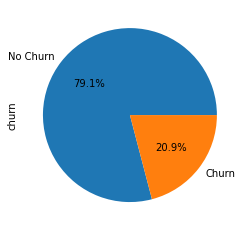

In [ ]:
labels = ['No Churn','Churn']
df_combined['churn'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=labels)

## **SUMMARY OF DATASET EXPLORATION**


*   There are 15 categorical variables and 181 continuous variables
*   From above chart we can see 79.1% of data being "No Churn" and 20.9% being Churn
*   Basic statistics on continuous data shows extreme range of data points within a column and also negative values for user_spendings. Need some data clean up, transformations to handle these issues.



# 2. **DATASET PREPROCESSING**

## 2.1 **MISSING VALUE EXPLORATION**

In [ ]:
df_combined.isnull().sum()[df_combined.isnull().sum() > 0]

6_user_lifetime                            8813
6_user_intake                              8813
6_user_no_outgoing_activity_in_days        8813
6_user_account_balance_last                8813
6_user_spendings                           8813
                                           ... 
7_last_100_sms_outgoing_count              8251
7_last_100_sms_outgoing_to_onnet_count     8251
7_last_100_sms_outgoing_to_offnet_count    8251
7_last_100_sms_outgoing_to_abroad_count    8251
7_last_100_gprs_usage                      8251
Length: 124, dtype: int64

Observing null values with 8813, these are because of lack of data for few customers in the 6th and 7th month. There are two ways we can fix these missing values

1. Completely excluding rows corresponding the missing values.

2. Imputing values to zero, as it makes more sense. (lack of data implies zero)

We tried both the methods and found 2nd method i.e. imputing values to zero is giving best result. 

In [ ]:
# Imputing values to zero, as it makes more sense
df_combined_impute_zero = df_combined.fillna(0)
df_combined_impute_zero.isnull().sum()

6_user_lifetime                            0
6_user_intake                              0
6_user_no_outgoing_activity_in_days        0
6_user_account_balance_last                0
6_user_spendings                           0
                                          ..
8_last_100_sms_outgoing_to_onnet_count     0
8_last_100_sms_outgoing_to_offnet_count    0
8_last_100_sms_outgoing_to_abroad_count    0
8_last_100_gprs_usage                      0
churn                                      0
Length: 187, dtype: int64

##**2.2 OUTLIER EXPLORATION**

In [ ]:
# Dropped negative values, as they are not in-line with real-world values.
df_combined_impute_zero = df_combined_impute_zero[df_combined_impute_zero >= 0]
df_combined_impute_zero.dropna(axis=0,inplace=True)
df_combined_impute_zero.isnull().sum()


6_user_lifetime                            0
6_user_intake                              0
6_user_no_outgoing_activity_in_days        0
6_user_account_balance_last                0
6_user_spendings                           0
                                          ..
8_last_100_sms_outgoing_to_onnet_count     0
8_last_100_sms_outgoing_to_offnet_count    0
8_last_100_sms_outgoing_to_abroad_count    0
8_last_100_gprs_usage                      0
churn                                      0
Length: 187, dtype: int64

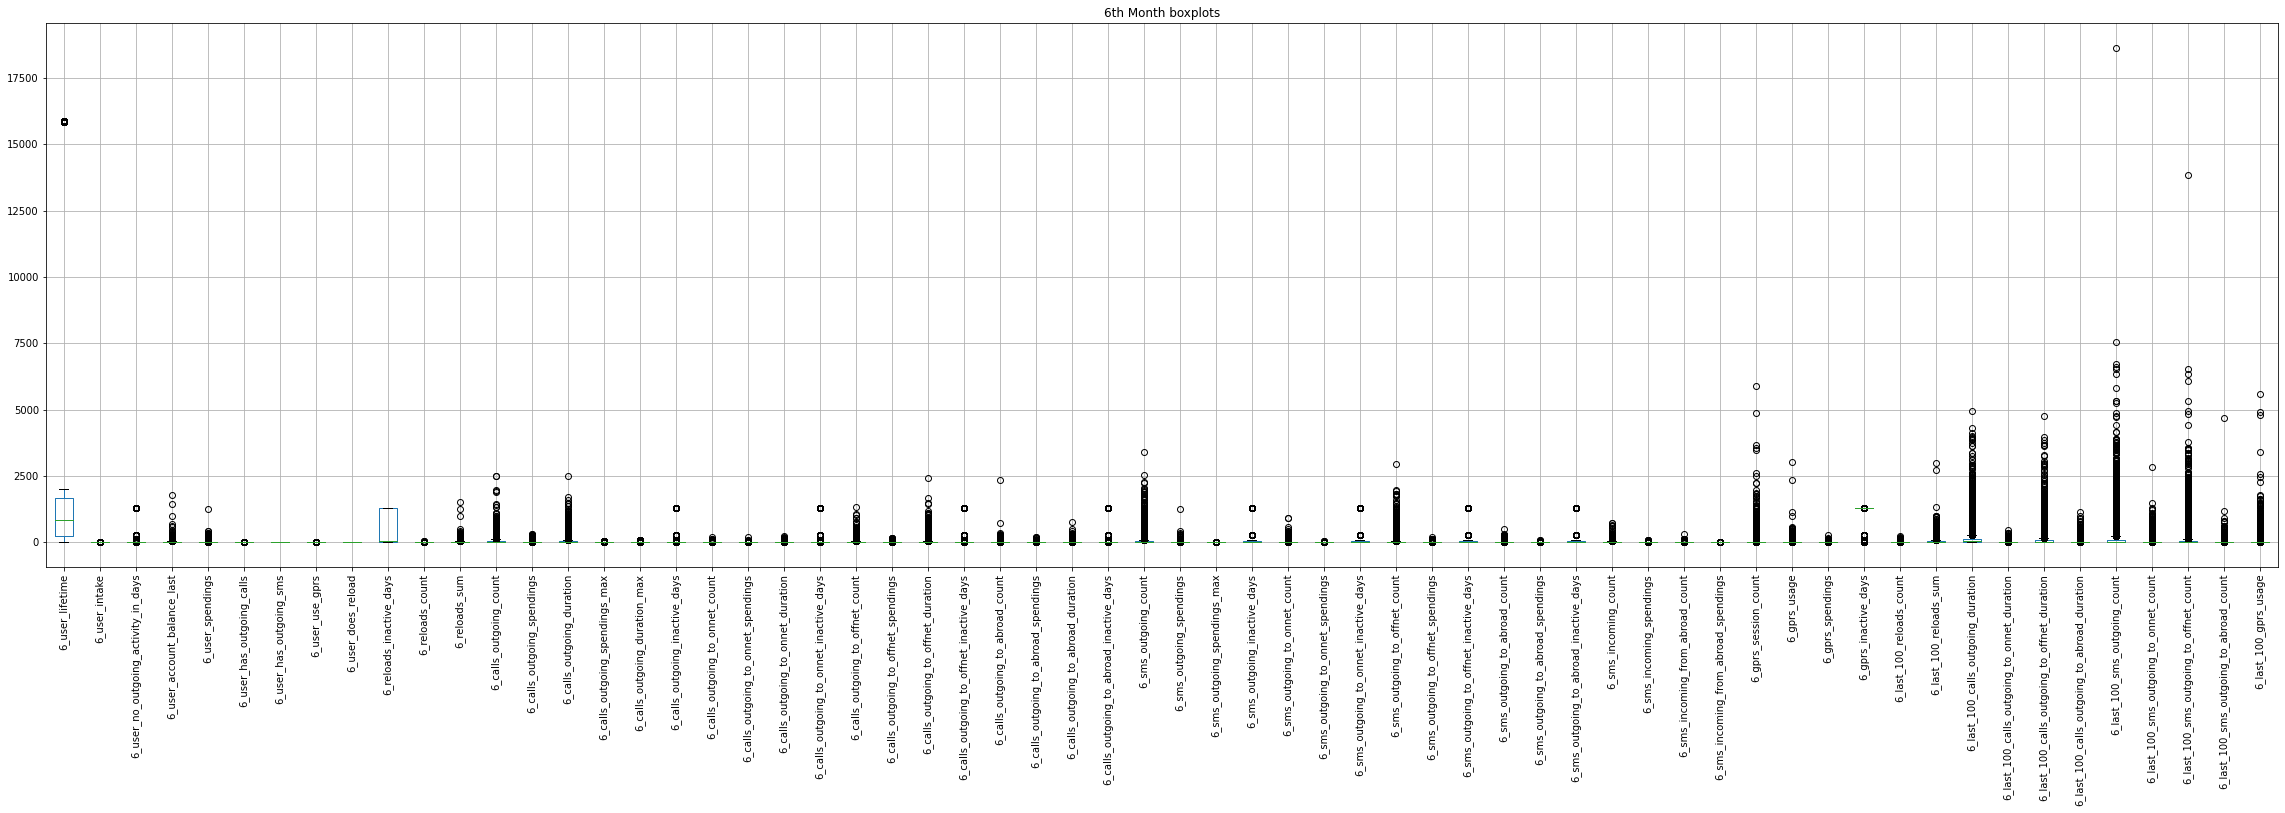

In [ ]:
figure(figsize=(8,6), dpi=250)

df_combined_impute_zero.iloc[:,0:62].boxplot()
plt.xticks(rotation = 90)
plt.title('6th Month boxplots')
plt.show()


From inspection, we found there are outliers in few predictors like user_lifetime, gprs_session_count, however we will resolve this using transformation after Train-Test split.

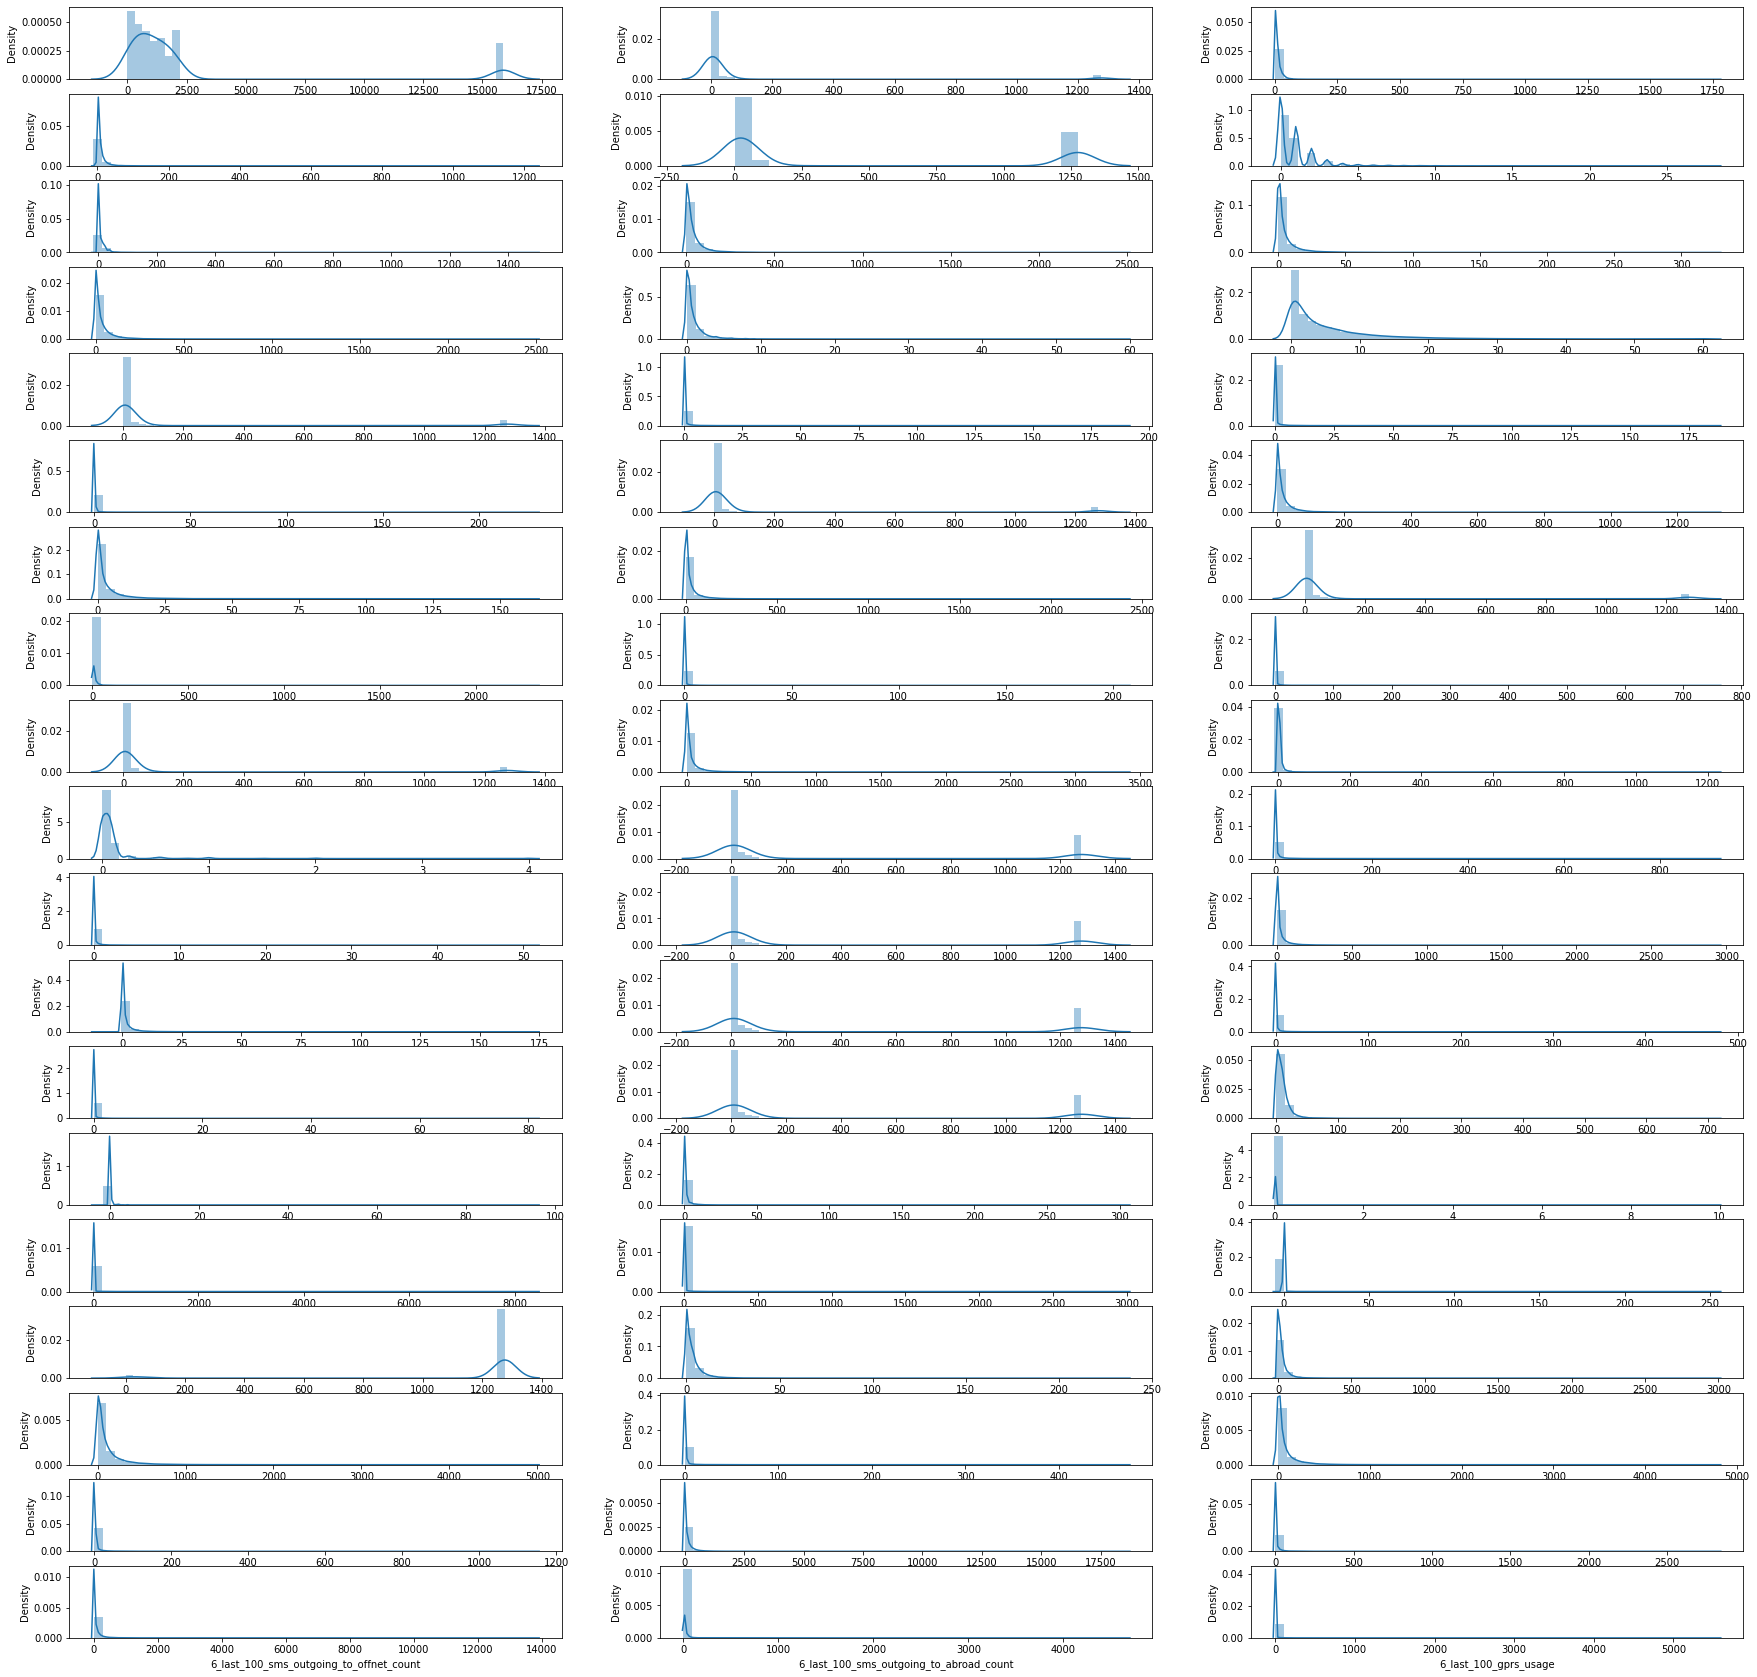

In [ ]:
# Below are distributions for continuous predictors
fig, axs = plt.subplots(ncols=3, nrows=19, figsize=(30, 30));
for i,j in zip(con_features,axs.ravel()):
  sns.distplot(df_combined[i],ax=j);

## **OBSERVATIONS**


1.   **Missing Values trail results:**

     With zero value imputation: Accuracy of 89%
     Exclude rows which dont have data for 6th/7th month data: 78%.
     
2.   **Outliers:** 

      We observed most of the data is right skewed, We decided to apply boxCox transformation as logistic regression is more susceptible to normality. Transformations are applied during Train-Test split.



#4. **EXPLORATORY DATA ANALYSIS**

### **HIGH LIFETIME USER CHURNING OUT**

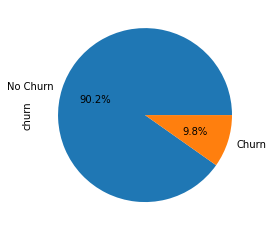

In [ ]:
EDA_df1 = df_combined_impute_zero[(df_combined_impute_zero['6_user_lifetime'] < 2500) & (df_combined_impute_zero['7_user_lifetime'] < 2500) & (df_combined_impute_zero['8_user_lifetime'] < 2500)]
labels = ['No Churn','Churn']
EDA_df1['churn'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=labels)

* From the boxplots in outliers exploration, we observed outliers for user_lifetime and with manual inspection we noticed all these high user life time customers are new users. 

* However all these new customers are having high churn rate. From above pie chart we can observe how excluding high life time customers has significantly reduced the share of churned customers from 20% to less than 10%.

**Recommendation:**

Given they have high user life time, they tend to be more loyal, however because of new plan they are churning out. We would recommend to identify the issue with new plan and try to provide any discounts or any customized plans for these set of customers. 

### **TRENDS IN USER/CALLS/SMS/GPRS DATA**

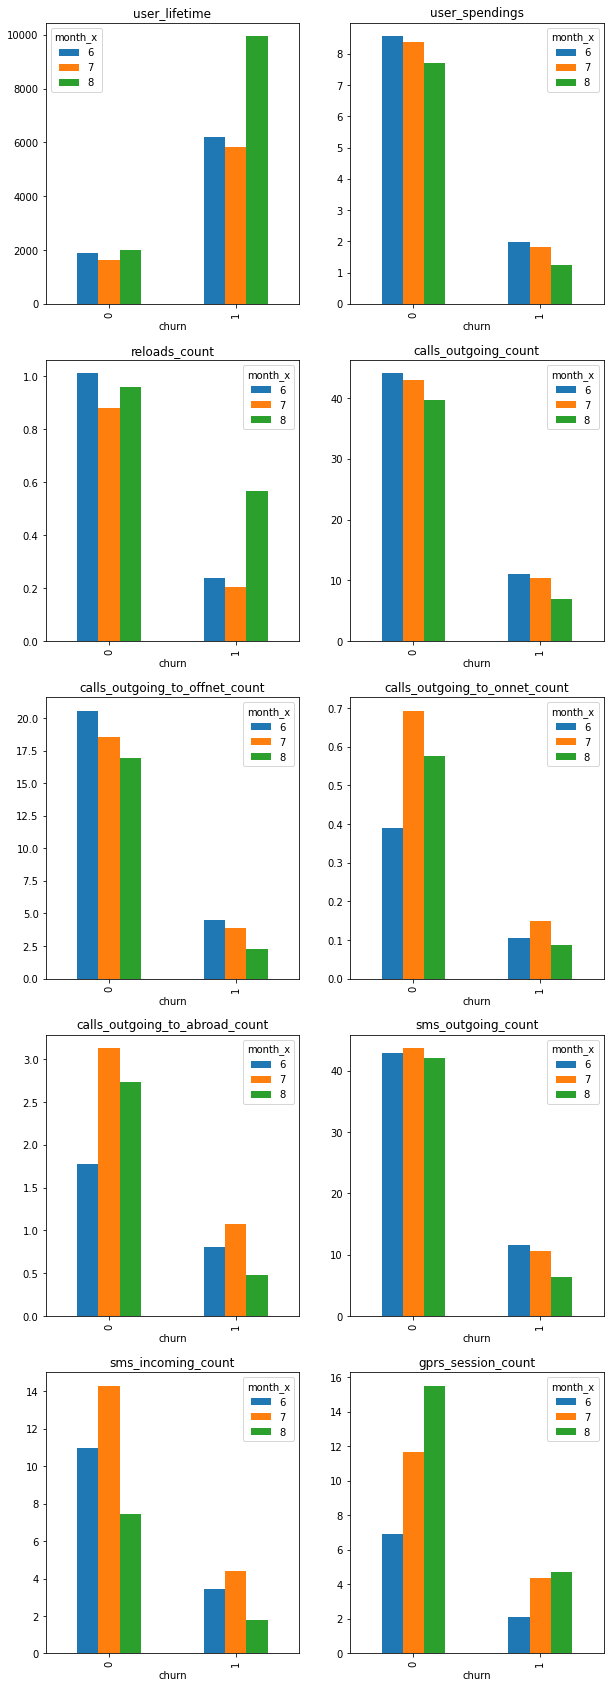

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(10, 30));

feat = ['user_lifetime','user_spendings','reloads_count','calls_outgoing_count','calls_outgoing_to_offnet_count','calls_outgoing_to_onnet_count','calls_outgoing_to_abroad_count','sms_outgoing_count','sms_incoming_count','gprs_session_count']

for i,j,k in zip(feat,range(len(feat)),axs.ravel()):
  temp = i
  pd.crosstab(EDA_df['churn'],EDA_df['month_x'],values=EDA_df[temp],aggfunc='mean').plot(kind='bar',ax=k,title=temp)


* **UserLifetime**

  Users having high user lifetime in August month are churning out more.
* **User_Spending, Call_Outgoing_count**

  User Spending and and outgoing_calls_count have reduced across 3 months for both churned and continuing customers.

* **Calls Outgoing Offnet/OnNET/Abroad**
   According to data, we see majority of users are Offnet.
   We see high activity for OnNet and Abroad Customers in July compared to other months. This can be attributed to elevated travel plans during summer month.

* **sms outgoing/incoming**

  For customers who are churning out, we see decreasing trend in sms_outgoning. 

* **GPRS session**
 We observe increase in activity of GPRS in month of July and August.


**Recommendations**

* Since there is high activity of onNet and Abroad in the month of July. We recommend to provide any subsidised roaming plans 
* September is the month, where new students travel and also many people take up jobs. They also move places, so we would recommend to diversify their network across places so they dont need to change the network. 



## **4.1 Continuous vs Continuous HeatMap**

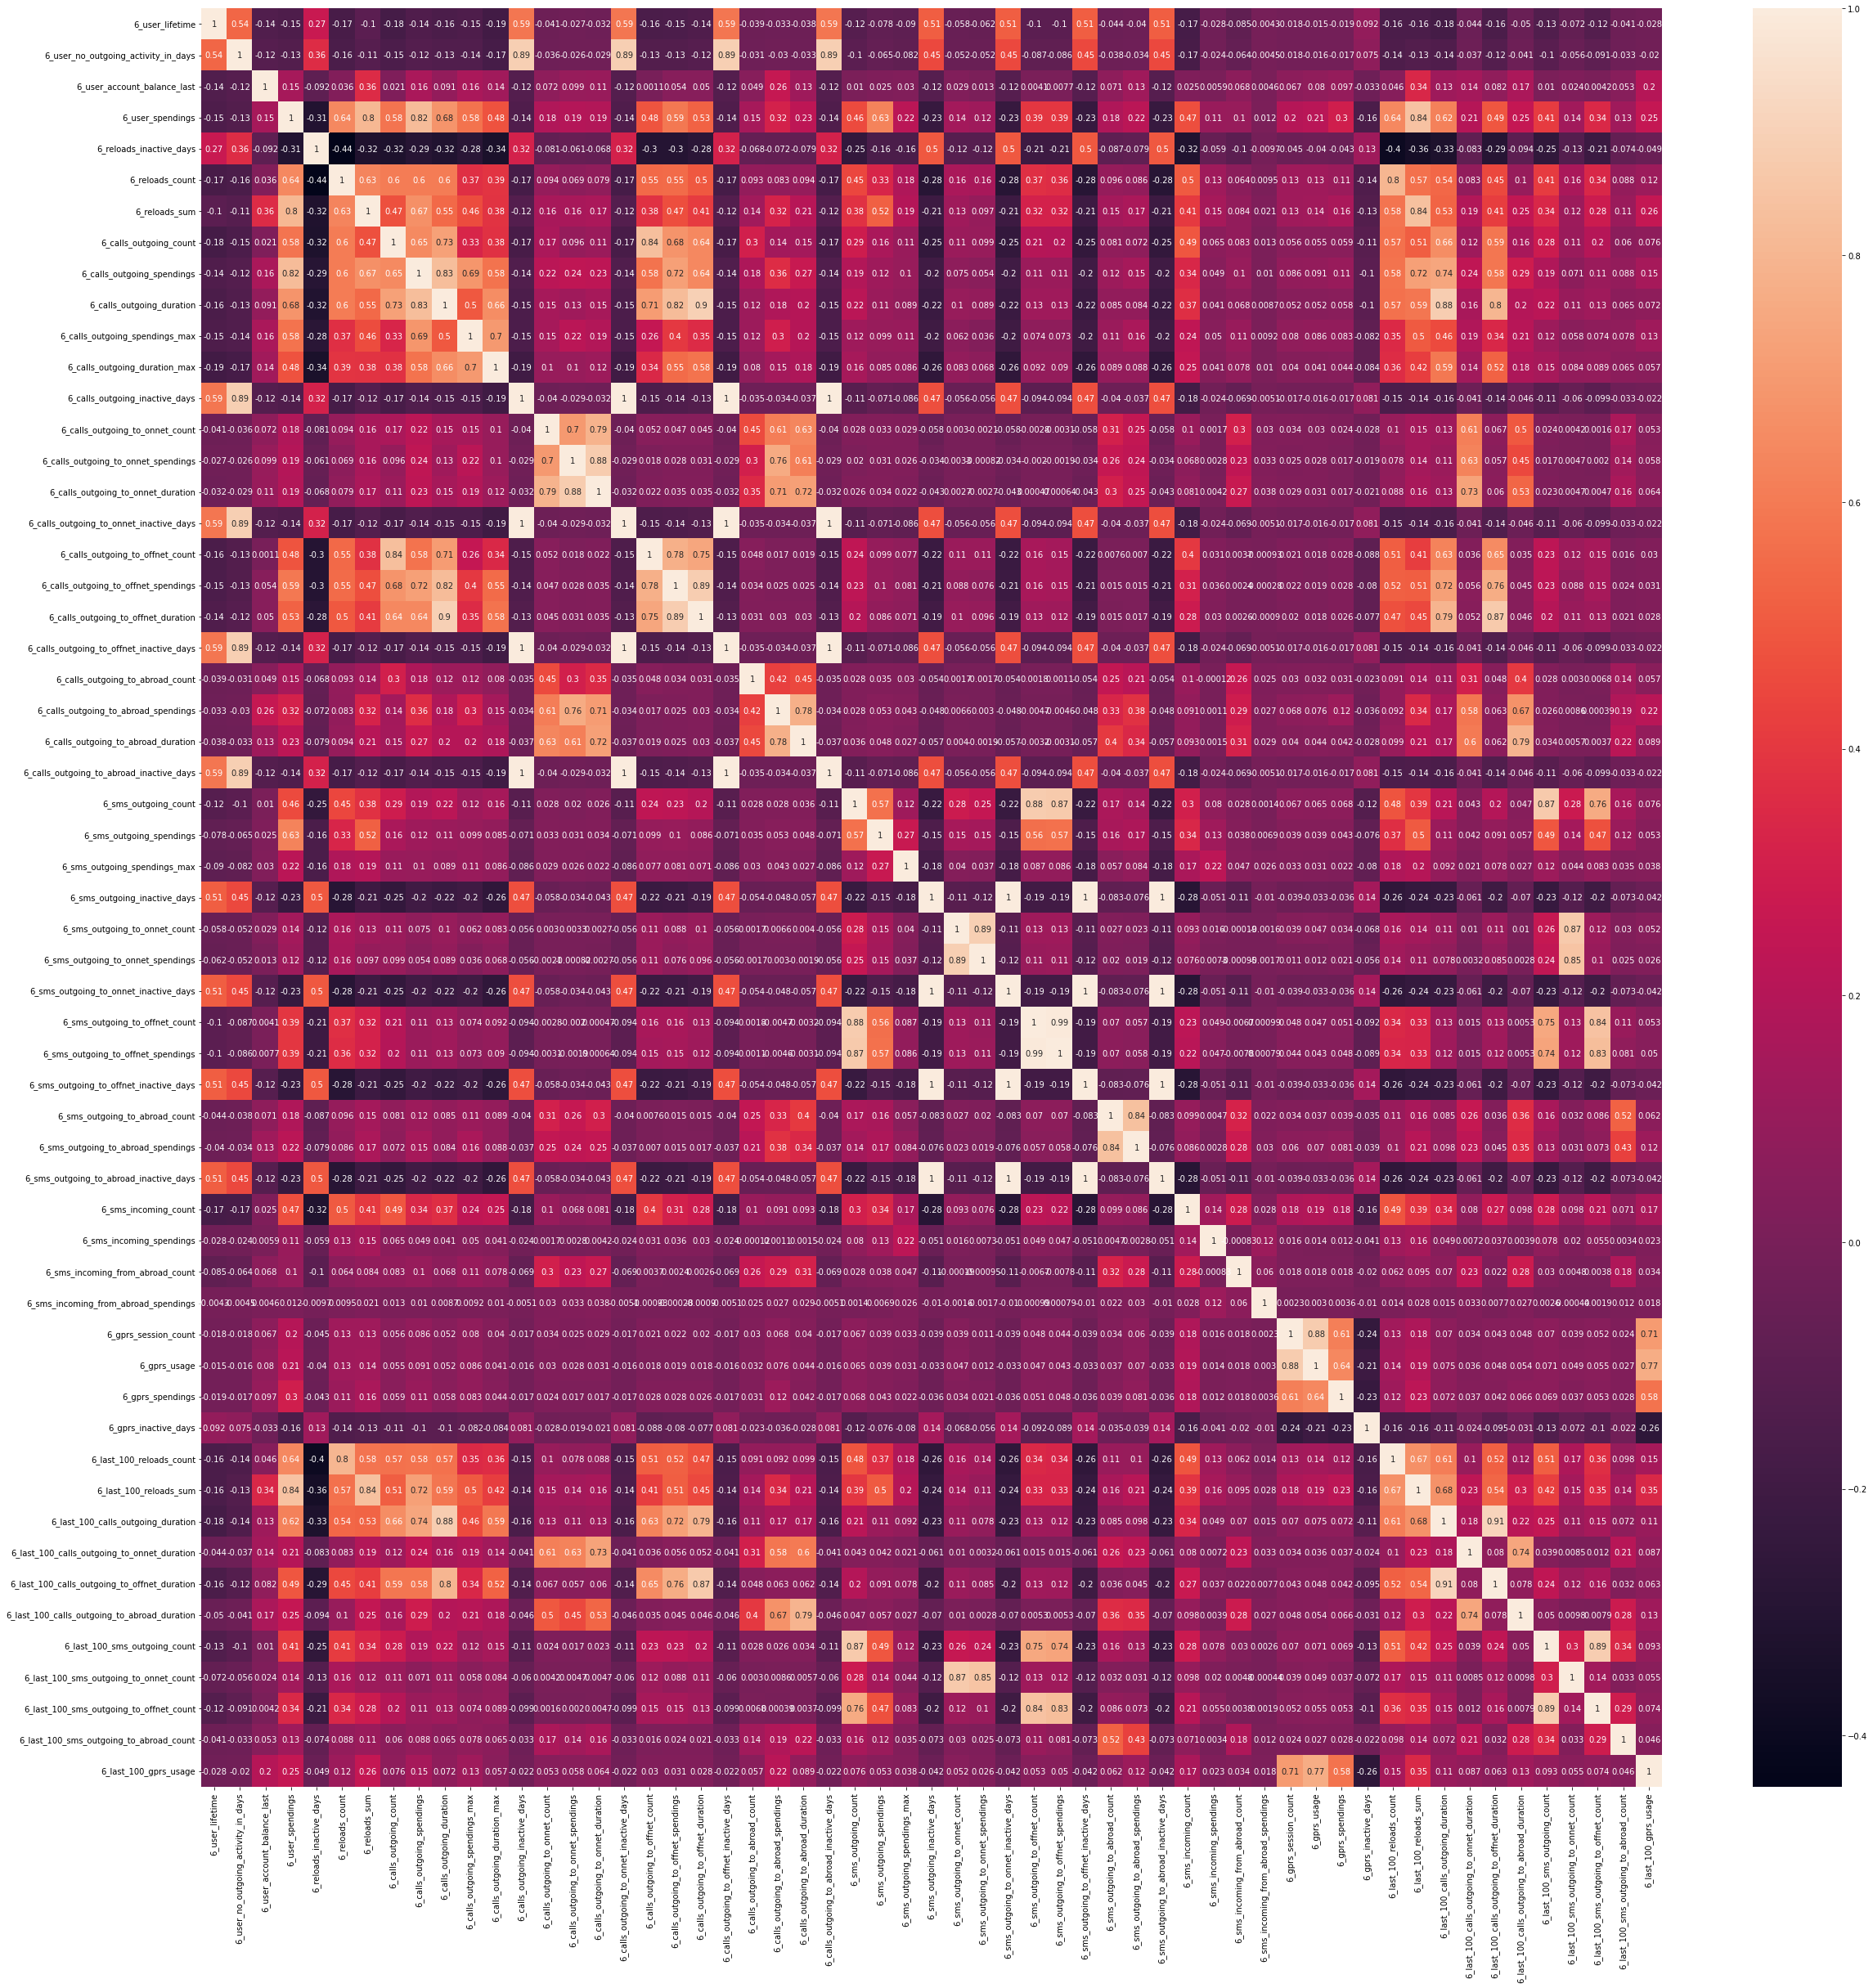

In [ ]:
#len(con_features
plt.figure(figsize=(40,40))
sns.heatmap(df_combined[con_features[0:57]].corr(),annot=True)


Correlation among predictors firstly convey similar information which is not helpful for our model. They also add additional complexity by exploding the dimensions.  Manually inspecting correlation map is not feasible as they are 171 continuous features. So below is piece of code, which filters out the features that have more than 0.8 correlation.




In [ ]:

# Unstack
pair_cols = []
pair_rows = []
corr_val = []
high_corr_cols = pd.DataFrame()
corr = df_combined[con_features].corr()
filter = corr[corr > 0.8 ]
filter
for i in filter.columns:
  for j in filter.index:
    if ~np.isnan(filter.loc[j,i]):
      if i!=j:
        pair_cols.append(i)
        pair_rows.append(j)
        corr_val.append(filter.loc[j,i])


high_corr_cols['cols'] = pair_cols
high_corr_cols['rows'] = pair_rows
high_corr_cols['corr'] = corr_val

high_corr_cols.sort_values(by=['corr'],inplace=True)


# Columns that are to be removed because of redundancy of information
cols_to_be_removed = high_corr_cols['cols'].unique()


con_features_after_removed = [x for x in con_features if x not in cols_to_be_removed]

# Concatenating categorical features to get final dataframe.
final_feat = con_features_after_removed+cat_features+['churn']

# Final dataframe

final_df = df_combined_impute_zero[final_feat]




In [ ]:
# Check for shape
final_df.shape

(65886, 60)

In [ ]:
# Length of final continuous features.
len(con_features_after_removed)

44

Wow! We have reduced our model to 60 columns from 171. Great improvement in overcoming complexity

## **4.2 Continuous vs Target plots** 

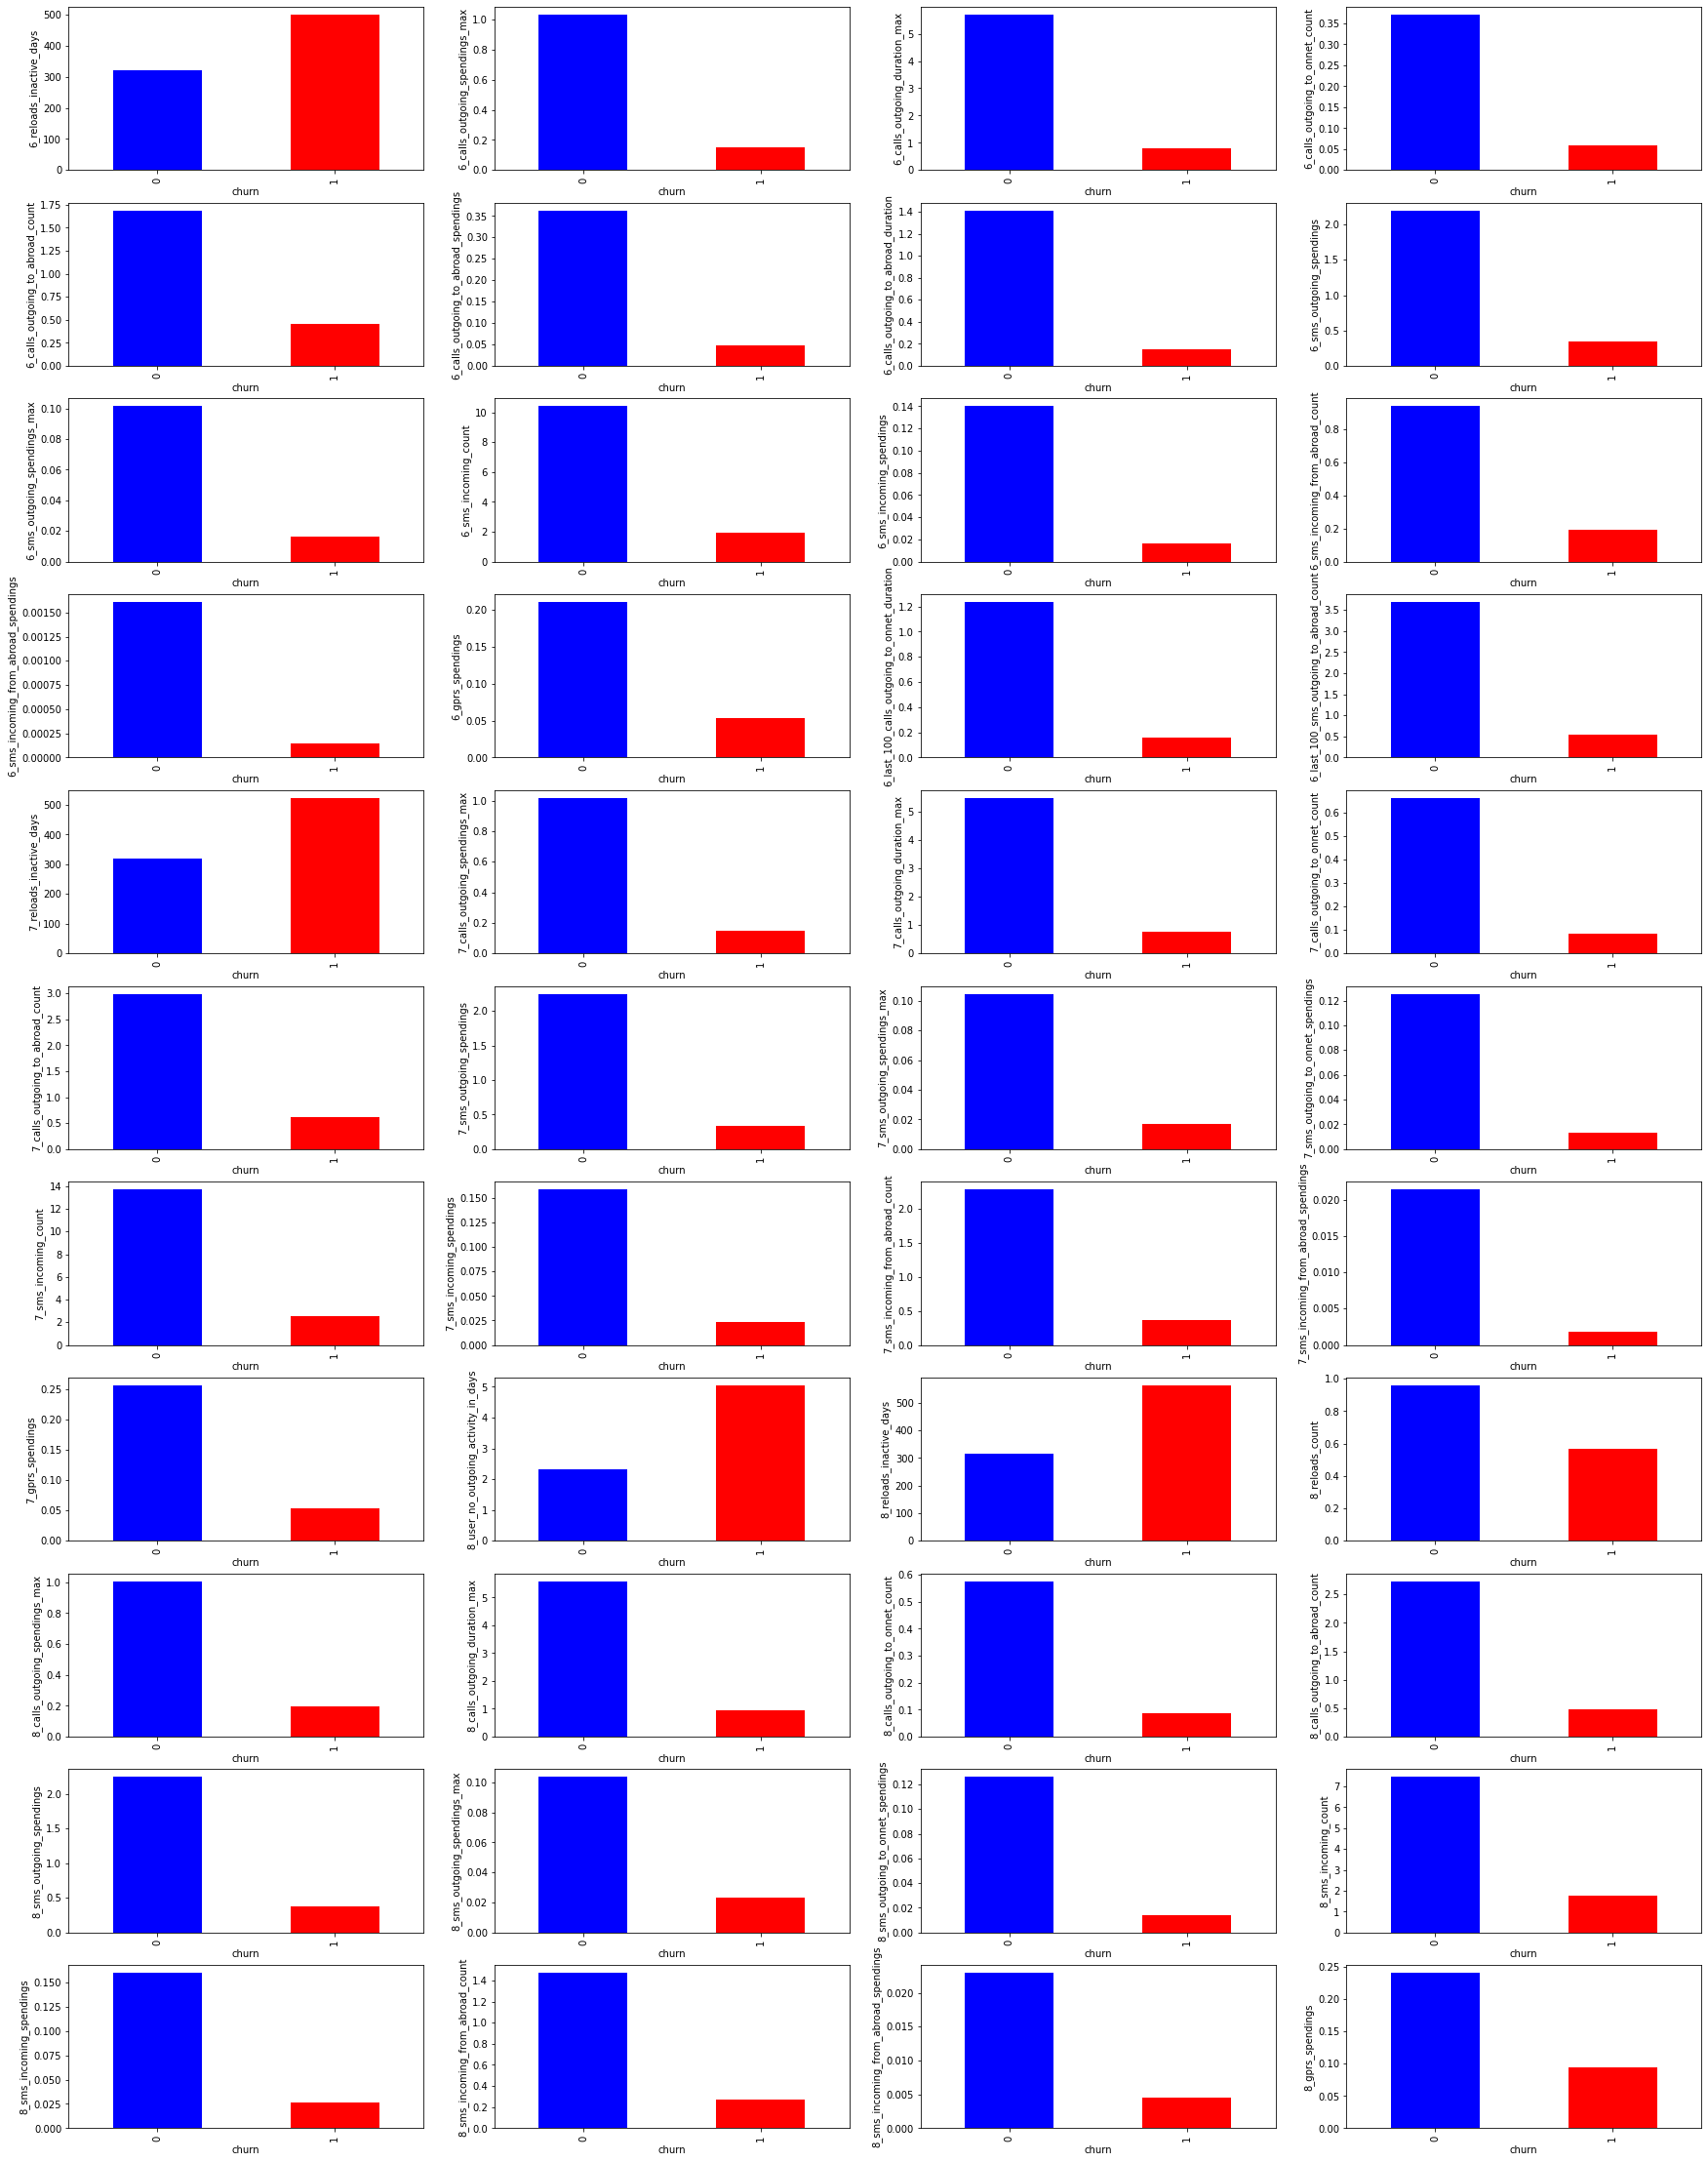

In [ ]:
cols  = con_features_after_removed
fig, axs = plt.subplots(ncols=4, nrows=11, figsize=(30, 40));
for i,j in zip(cols,axs.ravel()):

  final_df.groupby(['churn'])[i].mean().plot(kind='bar',ax=j,ylabel=i,color=['b','r'])
  

Following are continuous variables which are contributing to higher Churn characterisitics:

Higher
* 6_reloads_inactive_days
* 7_reloads_inactive_days
* 8_reloads_inactive_days
* 8_user_no_outgoing_activity_in_days

Coming to remaining variables
Lower values are contributing to higher churn rate.
For example: sms_incoming_spendings, calls_outgoing_spendings



## **4.3 Categorical vs Target plots**

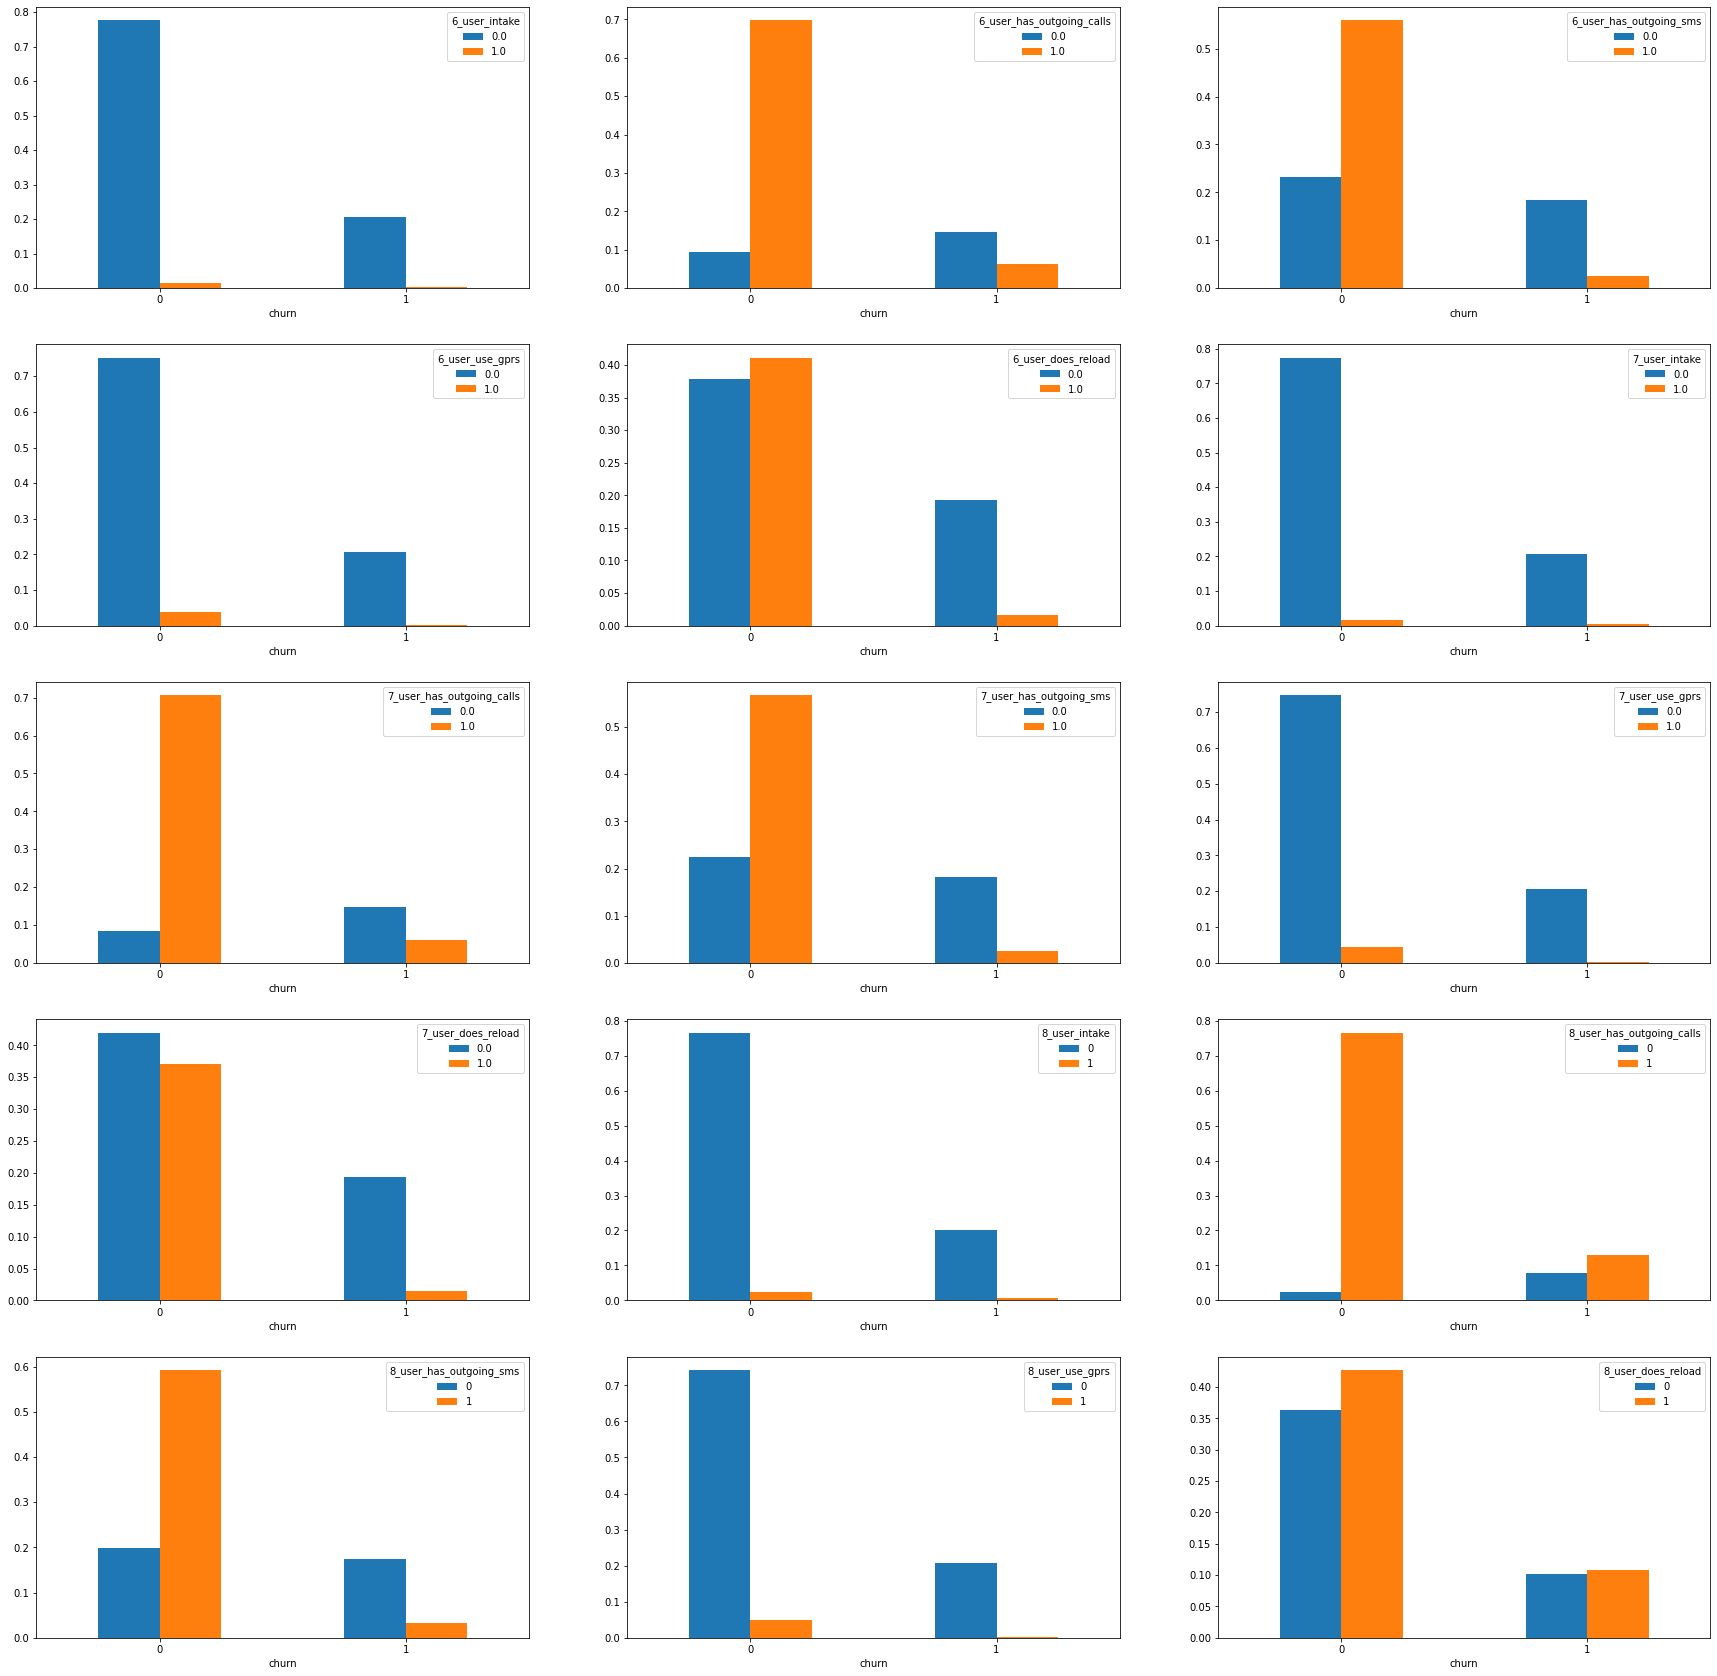

In [ ]:
cols  = cat_features
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(30, 30));
for i,j in zip(cols,axs.ravel()):

  pd.crosstab(final_df['churn'], final_df[i],normalize=True).plot.bar(rot=0,ax=j)
  

Categorical variables that are impacting churn



1. **Trends in-line with churn**

* In 6th and 7th months, the number of users who do not make user_has_outgoing_calls, user_has_outgoing_sms, user_does_reload are more than number of users who make outgoing calls/sms/reload.

* In 8th month, 8_user_has_outgoing_sms

  The number of users who have limited their usage in terms of calls/sms/reload are more compared to number of users who do not. 

2. **Irrevalant trend**

  6/7/8_user_have_gprs, 6/7/8_user_intake.
The number of users using or not using internet feature is not having much change in trend for churn and continuing customers.


3. **Interesting trends**

  * Interesting the number of users who make 8_user_has_outgoing_calls, 8_user_does_reload are seeing inverse relationship where the number of users who are showing higher activity rate in terms of calls and recharge are more in churn category than non-churn.
  *   Also number of new users are drastically more for churn type than non-churn type.









## **5. DATA PREPARATION (For Modeling)**

## **5.1 TRAIN_TEST SPLIT**

In [ ]:
y = final_df['churn']
X = final_df.drop(['churn'],axis=1)

In [ ]:
X.shape

(65886, 59)

We used the train test split for  splitting variables. Used stratefied split to ensure class imbalance to reflect in test set.

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=88,stratify=y)

In [ ]:
print('Training shape {} Testing shape {}'.format(X_train.shape,X_test.shape))

Training shape (52708, 59) Testing shape (13178, 59)


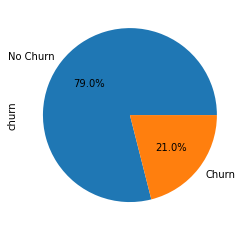

In [ ]:
Y_test.value_counts().plot(kind='pie',autopct='%1.1f%%',labels=labels)

## **5.2 DATA NORMALIZATION/TRANSFORMATIONS**

In [ ]:
cols = X_train.columns
# Standardization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)


In [ ]:

# Applying boxcox for all predictors
X_train_T = X_train.copy()
X_test_T   = X_test.copy()

cols = con_features_after_removed

for col in cols:
   X_train_T[col], fitted_lambda=stats.boxcox(X_train_T[col]+1)
   X_test_T[col] = stats.boxcox((X_test_T[col]+1), fitted_lambda)



In [ ]:
X_train_T.shape

(52708, 59)

In [ ]:
Y_train.shape

(52708,)

## 5.3 **BALANCING DATA**

In [ ]:
# Under sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomUnderSampler(random_state=0)
X_under, y_under = ros.fit_resample(X_train_T, Y_train)

ros1 = RandomOverSampler(random_state=0)
X_over, y_over = ros1.fit_resample(X_train_T, Y_train)

from imblearn.over_sampling import SMOTE
X_smote, y_smote = SMOTE().fit_resample(X_train_T, Y_train)
print(X_smote.shape)


(83234, 59)


Since the target is not balanced, we tried above sampling techniques.
* With Undersampling, we got same results as without Sampling
* With OverSampling/SMOTE the model is overfitting.

Hence we chose to proceed without balancing the data.

## **5.4 PRINCIPLE COMPONENT ANALYSIS -  PERSPECTIVE**

In [ ]:
data_train  = X_train_T

Train_con_df = data_train.iloc[:,0:44]
Test_con_df = X_test_T.iloc[:,0:44]
pca = PCA(n_components=10)
train_pca = pca.fit_transform(Train_con_df)
test_pca  = pca.transform(Test_con_df)
print("With 10 components the explained variance in percentage:",pca.explained_variance_ratio_.sum()*100)

X_train_pca = pd.DataFrame(data = train_pca)
X_train_pca1 = pd.concat([X_train_pca,data_train.iloc[:,44:]],axis=1)


X_test_pca = pd.DataFrame(data = test_pca)
X_test_pca1 = pd.concat([X_test_pca,X_test_T.iloc[:,44:]],axis=1)



With 10 components the explained variance in percentage: 99.66650151734142


Using PCA with 10 components out of 44 continuous values, we are able to explain 99% of variance. We performed modeling using the PCA features and identified that results are identical with and without dimesionality reduction.
However, PCA are not interpretable hence we proceeded with actual features.

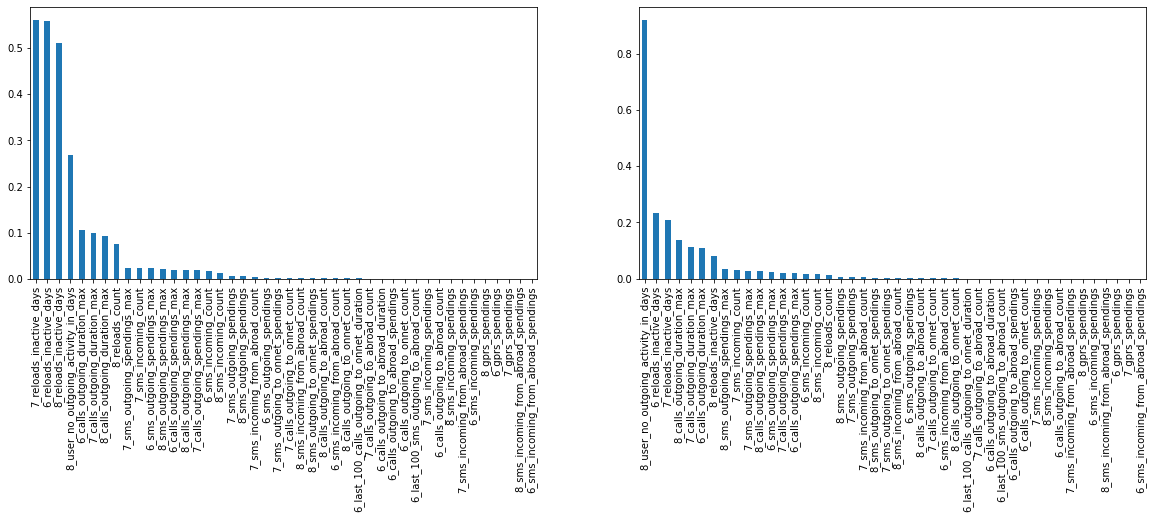

<Figure size 720x720 with 0 Axes>

In [ ]:
# Important features based on PCA
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 5));
dataset_pca = pd.DataFrame(abs(pca.components_), columns=Train_con_df.columns, index=['PC_1', 'PC_2','PC_3','PC_4', 'PC_5','PC_6','PC_7', 'PC_8','PC_9','PC_10'])
plt.figure(figsize=(10,10))
for i,j in zip(range(2),axs.ravel()):
  dataset_pca.iloc[i,:].sort_values(ascending=False).plot(kind='bar',ax=j)
  #dataset_pca.iloc[1,:].sort_values(ascending=False).plot(kind='bar',ax=axs[1])


Following are the features that are dominant in PC1 and PC2.
* In PC1/PC2 6/7/8 reload_inactive_days,6/7/8 calls_outgoing_duration are having major contribution



# **6. MODELING**

## **6.1 CROSS VALIDATION CHECK (USING PIPELINE)**

* We used stratifiedKFold to ensure class imbalance reflect in Cross Validation. 
* Since the data is not balanced, We also used F1 scoring to check the model performance.

In [ ]:
cv_LR = LogisticRegression()
cv_DTC = DecisionTreeClassifier(random_state=1)
cv_RFC = RandomForestClassifier(random_state=1)
cv_GBC = GradientBoostingClassifier(random_state=1)
cv_XGB = XGBClassifier(random_state=1)
cv_SVM = SVC(random_state=1)

models = [cv_LR, cv_DTC, cv_RFC, cv_GBC, cv_XGB, cv_SVM]

scaler = MinMaxScaler()


cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)

for model in models:

  pipeline = Pipeline([('estimator', model)]) 

  scores = cross_val_score(pipeline, X_train_T, Y_train, scoring='f1', cv=cv, n_jobs=-1)

  #print(f'{model}: {scores}')

  ave_scores = np.mean(scores)

  print(f'{model} accuracy: {ave_scores}')

LogisticRegression() accuracy: 0.7189542718542818
DecisionTreeClassifier(random_state=1) accuracy: 0.6644678738846304
RandomForestClassifier(random_state=1) accuracy: 0.7184442535492253
GradientBoostingClassifier(random_state=1) accuracy: 0.7317884561624475
XGBClassifier(random_state=1) accuracy: 0.7289938143223107


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


SVC(random_state=1) accuracy: 0.720825704199705


## **6.2 MODEL TUNING FOR BEST PARAMETERS**

* For parameter tuning, we following below strategy,
We fixed a learning rate, and iterated over multiple parameters to see if there is any improvement in cross validation score, if the score dropped, we moved on to the next parameter.

Source:
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/


* We used f1 score as evaluation metric.

In [ ]:
from sklearn.model_selection import GridSearchCV


param_test1 = {
 'max_depth':range(3,8,2),
}

param_test2 = {
'min_samples_split':[i+2 for i in range(0,5)]
}

param_test3 = {
'max_features':[2,6,9,12,16]
}

param_test4 = {
 'subsample':[(i+1)/10.0 for i in range(6)],
}

param_test5 = {
  
  'n_estimators':[(i+1)*100 for i in range(0,5)],
}



## Comment in order to publish in kaggle.

grid_cv_GBC = GridSearchCV(estimator = GradientBoostingClassifier( random_state=1,learning_rate =0.01,n_estimators=400, max_depth=7,
subsample=0.6,min_samples_split=6), param_grid=param_test5, cv=5,scoring='f1',n_jobs=-1)



grid_cv_GBC.fit(X_train_T,Y_train)

print("Accuracy::{}".format(grid_cv_GBC.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_GBC.best_params_))

# Beeps sound when run completes
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

Accuracy::0.7276732784226737
Best Hyperparameters::
{'n_estimators': 400}


Following are best set of parameters.
* learning_rate =0.01
* n_estimators=400
* max_depth=7
* subsample=0.6
* min_samples_split=6

***With Tuning we improved F1 score from 0.67 to 0.726 which is 8.3% improvement***

## **7. EVALUATION**

In [ ]:
# Used parameters obtained from hyper parameter tuning.
GBC = GradientBoostingClassifier( random_state=1,learning_rate =0.01,n_estimators=400, max_depth=7,
 subsample=0.6,min_samples_split=6)



# fit the model - 
GBC = GBC.fit(X_train_T,Y_train)

# store the predictions
train_preds_GBC = GBC.predict(X_train_T) 
test_preds_GBC = GBC.predict(X_test_T) 

# Calculate the probabilities
test_proba_GBC1 = GBC.predict_proba(X_test_T) 
train_proba_GBC1 = GBC.predict_proba(X_train_T) 

print("Train Result \n")
trainReport = classification_report(Y_train, train_preds_GBC)
print(trainReport)
print("Test Result \n")
testReport = classification_report(Y_test, test_preds_GBC)

print(testReport)

Train Result 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     41617
           1       0.80      0.73      0.76     11091

    accuracy                           0.91     52708
   macro avg       0.87      0.84      0.85     52708
weighted avg       0.90      0.91      0.90     52708

Test Result 

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     10405
           1       0.77      0.68      0.73      2773

    accuracy                           0.89     13178
   macro avg       0.85      0.82      0.83     13178
weighted avg       0.89      0.89      0.89     13178



## **PRECISION RECALL CURVE**

In [ ]:
# Training PR curve (run if needed)
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_predictions(Y_train, train_proba_GBC1[:,1], name="Gradient Boosting")
_ = display.ax_.set_title("2-class Precision-Recall curve")

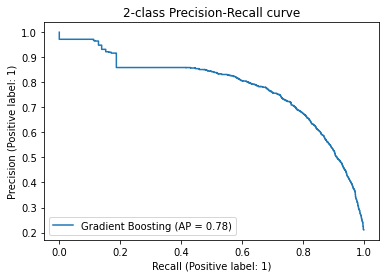

In [ ]:
# Test PR curve
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_predictions(Y_test, test_proba_GBC1[:,1], name="Gradient Boosting")
_ = display.ax_.set_title("2-class Precision-Recall curve")

CV iteration 1: Optimal Threshold is 0.3904737786591202, Optimal recall is 0.7533357374684457, Optimal precision is 0.7293994413407822, Max F1 Score 0.7411743835373426
CV iteration 2: Optimal Threshold is 0.39313408732189137, Optimal recall is 0.7598269022719076, Optimal precision is 0.7220699108978753, Max F1 Score 0.7404674046740468
CV iteration 3: Optimal Threshold is 0.3765933293932653, Optimal recall is 0.7576631806707537, Optimal precision is 0.7237340682053048, Max F1 Score 0.7403100775193798
CV iteration 4: Optimal Threshold is 0.3772145497571037, Optimal recall is 0.7594662820050487, Optimal precision is 0.7192622950819673, Max F1 Score 0.7388177512717068
CV iteration 5: Optimal Threshold is 0.37969269988161813, Optimal recall is 0.7609087630724847, Optimal precision is 0.7208746156474206, Max F1 Score 0.7403508771929825


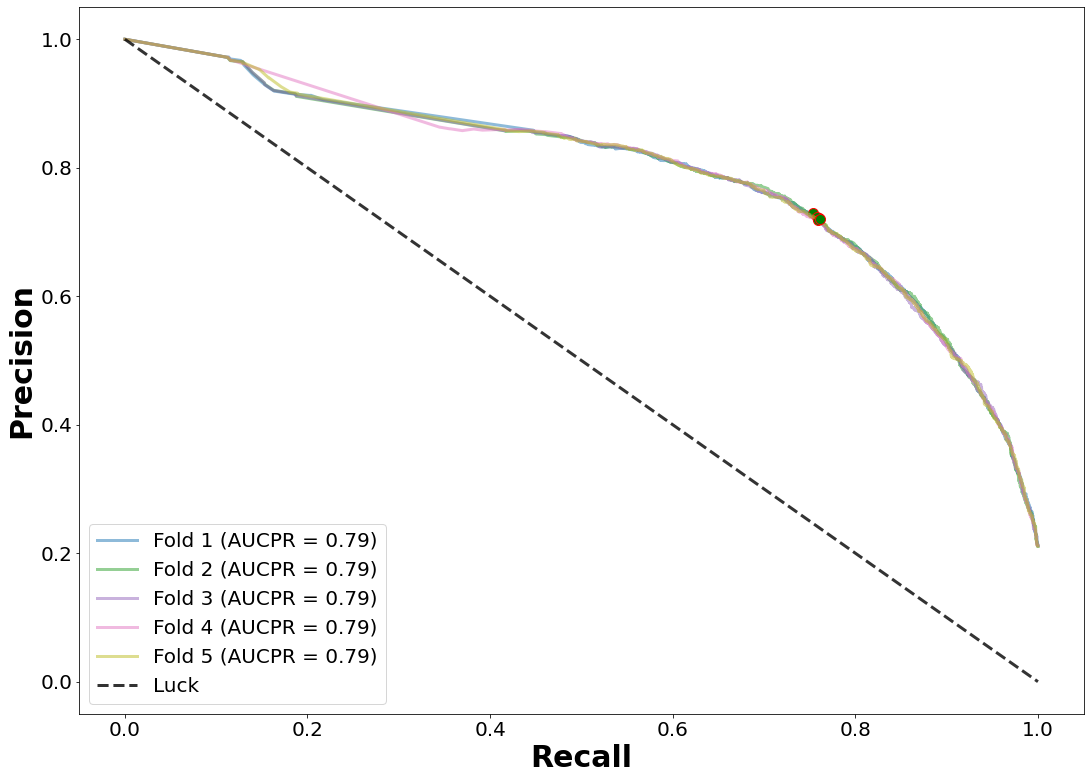

Average Precision 0.72306806623467, Average Recall 0.7582401730977282, Average Max F1 Score 0.7402240988390917,Average_optimal threshold: 0.38342168900259976


In [ ]:
from scipy import interp
from sklearn.metrics import roc_curve, auc, precision_recall_curve
# defining the lists
prs = []
aucs = []

a_pr = []
a_re = []
a_f1 = []
a_th = []
mean_recall = np.linspace(0, 1, 100)
    
plt.figure(figsize=(18 , 13))
i = 0
for train, test in cv.split(X_train_T, Y_train):
  
    probas_ = GBC.fit(X_train_T.iloc[train,:], Y_train.iloc[train]).predict_proba(X_test_T)
        # Compute PR curve and area the curve
    precision, recall, thresholds = precision_recall_curve(Y_test, probas_[:, 1])
    
    f1_scores = 2*recall*precision/(recall+precision)
    #print('Best threshold: ', thresholds[np.argmax(f1_scores)])
    optimal_idx = np.argmax(f1_scores)
  
    prs.append(np.interp(mean_recall, precision, recall))
    pr_auc = auc(recall, precision)
    aucs.append(pr_auc)
    plt.plot(recall, precision, lw=3, alpha=0.5, label='Fold %d (AUCPR = %0.2f)' % (i+1, pr_auc))
    plt.plot(recall[optimal_idx], precision[optimal_idx], marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
    
    i += 1

    a_re.append(recall[optimal_idx])
    a_pr.append(precision[optimal_idx])
    a_f1.append(f1_scores[optimal_idx])
    a_th.append(thresholds[optimal_idx])
    print("CV iteration {}: Optimal Threshold is {}, Optimal recall is {}, Optimal precision is {}, Max F1 Score {}".format(i,thresholds[optimal_idx],recall[optimal_idx],precision[optimal_idx],f1_scores[optimal_idx]))
    
plt.plot([0, 1], [1, 0], linestyle='--', lw=3, color='k', label='Luck', alpha=.8)
mean_precision = np.mean(prs, axis=0)
mean_auc = auc(mean_recall, mean_precision)
std_auc = np.std(aucs)
#plt.plot(mean_precision, mean_recall, color='navy',
  #           label=r'Mean (AUCPR = %0.3f $\pm$ %0.2f)' % (mean_auc, std_auc),
   #          lw=4)
    


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Recall' ,  fontweight = "bold" , fontsize=30)
plt.ylabel('Precision',fontweight = "bold" , fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend( prop={'size':20} , loc = 0)

plt.show()

print("Average Precision {}, Average Recall {}, Average Max F1 Score {},Average_optimal threshold: {}".format(np.mean(a_pr),np.mean(a_re),np.mean(a_f1),np.mean(a_th)))


* Average Precision 0.722660326624038
* Average Recall 0.7649047105357785
* Average Max F1 Score 0.7431576029108077
* Average_optimal threshold: 0.3634658043646729

Area under PR Curve is 0.80

## **PLOT ROC_CURVE**

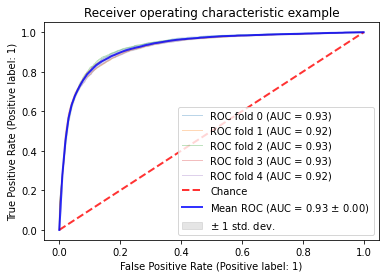

In [ ]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

# Run classifier with cross-validation and plot ROC curves


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X_train_T, Y_train)):
    
    GBC.fit(X_train_T.iloc[train,:], Y_train.iloc[train])
    viz = RocCurveDisplay.from_estimator(
        GBC,
        X_train_T.iloc[test,:],
        Y_train.iloc[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

On plotting ROC, we got AUC of 0.93

## **Testing Results based on Optimal Threshold Selection from PR Curve**

In [ ]:
test_preds_opt = test_proba_GBC1[:,1] > 0.3634
#trainReport = classification_report(y_under, train_preds_GBC)
testReport = classification_report(Y_test, test_preds_opt)
print(testReport)

              precision    recall  f1-score   support

           0       0.94      0.91      0.93     10405
           1       0.71      0.77      0.74      2773

    accuracy                           0.88     13178
   macro avg       0.82      0.84      0.83     13178
weighted avg       0.89      0.88      0.89     13178



In [ ]:
# Confusion matrix (Test)
confusion_matrix(Y_test,test_preds_opt)

array([[9520,  885],
       [ 640, 2133]])

For our business, Recall is more critical than Precision.
Because Recall is dependant on False Negatives. More False negatives would classify churned customers as continuing customers. Hence we might miss the opportunity to address the problems related to them.

From confusion matrix, we are seeing lower FNs than FPs. We can also tune the threshold to reduce FNs. However overdoing it might effect the sole purpose of identifying churned customers because of higher FPs.

# **FEATURE IMPORTANCE (GINI Impurity & Permutation method)**

In [ ]:


feature_importance = GBC.feature_importances_
importance_df = pd.DataFrame({'features': X_train_T.columns,
                              'importance': feature_importance})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
importance_df


,features,importance
24,7_sms_incoming_count,0.576754
33,8_calls_outgoing_duration_max,0.103673
29,8_user_no_outgoing_activity_in_days,0.046850
50,7_user_has_outgoing_calls,0.041650
30,8_reloads_inactive_days,0.024500
2,6_calls_outgoing_duration_max,0.018542
45,6_user_has_outgoing_calls,0.017649
39,8_sms_incoming_count,0.014312
36,8_sms_outgoing_spendings,0.013456
18,7_calls_outgoing_duration_max,0.013425


<Figure size 2880x720 with 0 Axes>

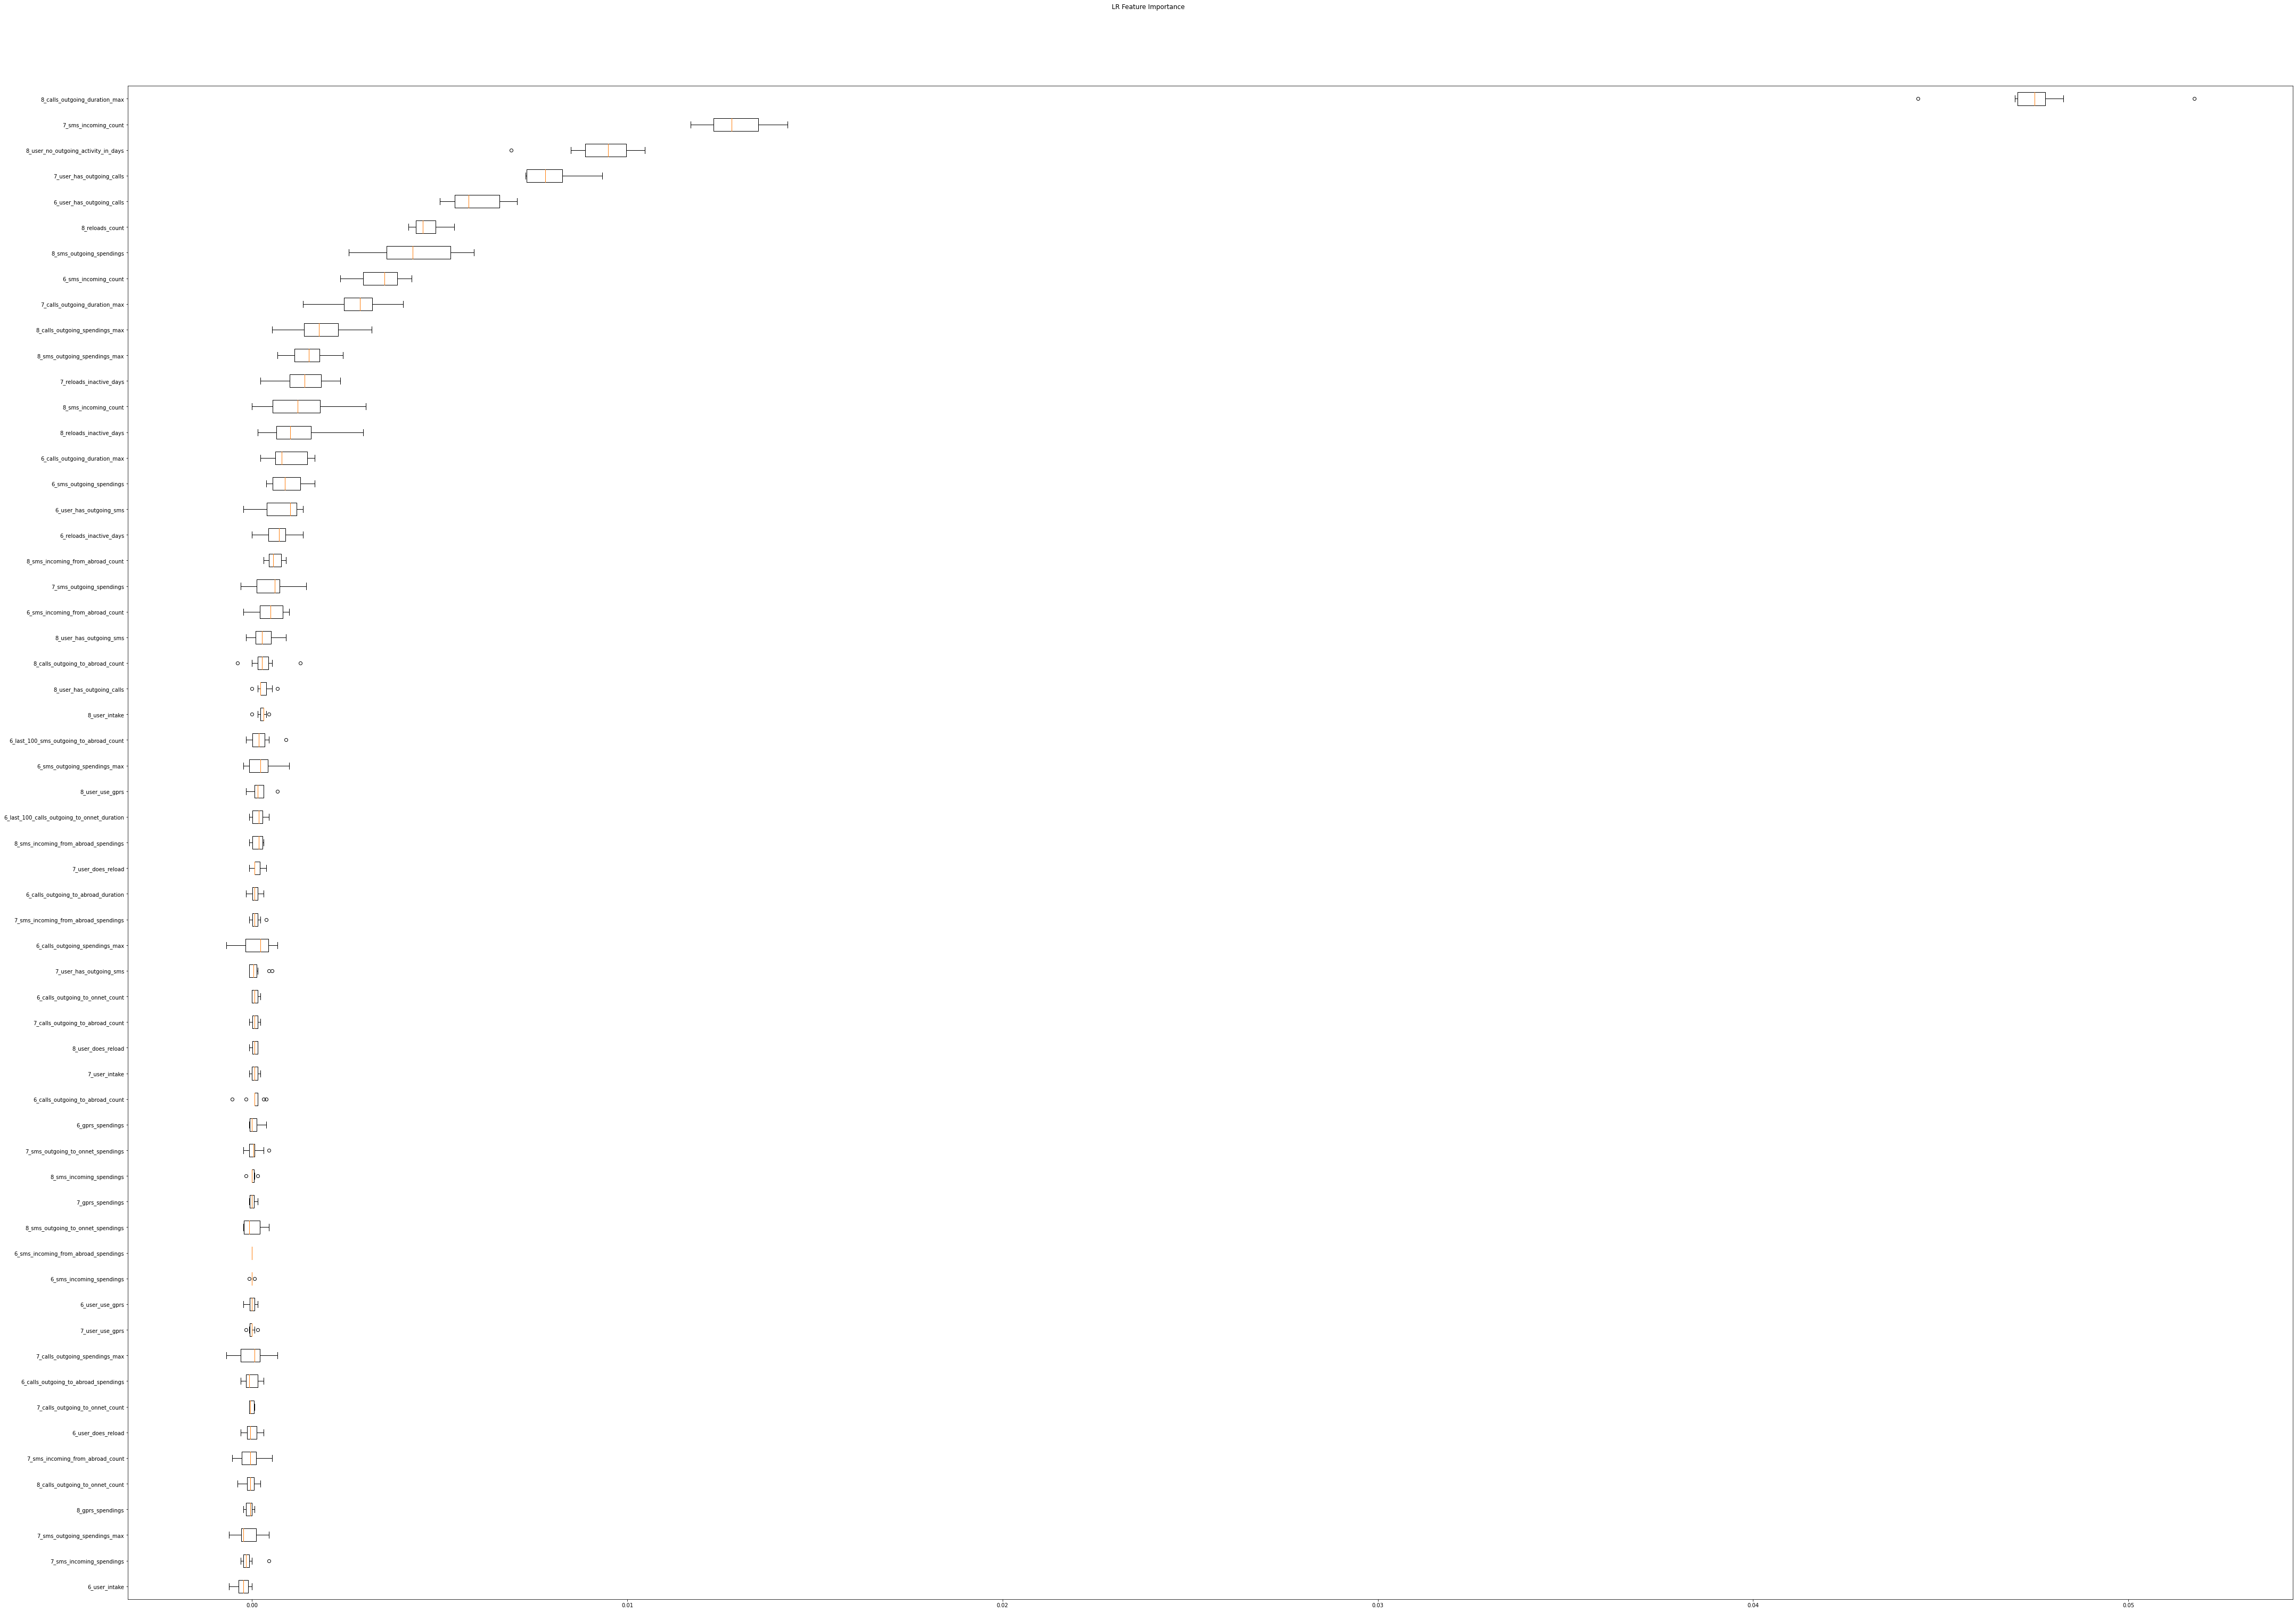

In [ ]:
plt.figure(figsize=(40, 10))

clf = GBC # don't forget to update title!

result = permutation_importance(clf, X_test_T, Y_test, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

fig, ax1 = plt.subplots(1, 1, figsize=(60, 40))
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
fig.suptitle('LR Feature Importance', y=1.05) # don't forget to update title!
fig.tight_layout()
plt.show()

Based on permutation feature importance technique, we found following features are contributing the most.

* 8TH MONTH
  
  call_outgoing_duration_max
  user_no_ourgoing_activity_in_days
  reloads_count
  reloads_inactive_days
  sms_outgoing_spendings

* 7TH MONTH
  
  user_has_outgoing_calls
  sms_incoming_count

* 6TH MONTH
  
  user_has_outgoing_calls
  calls_outgoing_duration_max
  sms_incoming_count

